<a href="https://colab.research.google.com/github/Nusnan-AM/Research_models/blob/main/KNN_Jar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN


# Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 20180501_174635.jpg
 20180501_174733.jpg
 20180501_174736.jpg
 application-aptitude-2020.pdf
 catboost_info
'Colab Notebooks'
 colour_random_jar_model.pkl
'Contact '
'Contact Information.gform'
'Copy of randomforest.ipynb'
'CST20083  AM.NUSNAN.mp4'
'CST382-3_1_Introduction (1).gslides'
'CST382-3_2_Sampling and Quantization.gslides'
'CST WAD  Group - C.gdoc'
'Design Documentation on Boarding Project.gdoc'
'Document from Serial Ghost'
 DSC_0004.JPG
 DSC_0087.JPG
 DSC_0089.JPG
 DSC_0096.JPG
 DSC_0100.JPG
 DSC_0105.JPG
 DSC_0106.JPG
 DSC_0107.JPG
 DSC_0109.JPG
 DSC_0110_1.JPG
 DSC_0111_1.JPG
 DSC_0113.JPG
 DSC_0114_1.JPG
 DSC_0114.JPG
 DSC_0115.JPG
 DSC_0116_1.JPG
 DSC_0117.JPG
 DSC_0119.JPG
 DSC_0124.JPG
 DSC_0125_1.JPG
 DSC_0127.JPG
 DSC_0128.JPG
 DSC_0129.JPG
 DSC_0130.JPG
 DSC_0131.JPG
 DSC_0140.JPG
 DSC_0143_1.JPG
 DSC_0146_1.JPG
 DSC_0147_1.JPG
 DSC_0148_1.JPG
 DSC_0148_2.JPG
 DSC_0149_1.JPG
 DSC_0150_1.JPG
 DSC_0152_1.JPG
 DSC_0154.JPG
 DSC_0156.JPG
 DSC_

In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
data = pd.read_csv("jartest.csv")

In [ ]:
X_turbidity = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_ph = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_colour = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
y_turbidity = data['Turbidity']  # Target: Turbidity
y_ph = data['PH']  # Target: PH
y_colour = data['Colour']

# Model development

## Turbidiy


In [ ]:
X_turbidity_train, X_turbidity_test, y_turbidity_train, y_turbidity_test = train_test_split(X_turbidity, y_turbidity, test_size=0.2, random_state=42)

In [ ]:
model_turbidity = KNeighborsRegressor()

In [ ]:
model_turbidity.fit(X_turbidity_train, y_turbidity_train)

KNeighborsRegressor()

## PH

In [ ]:
X_ph_train, X_ph_test, y_ph_train, y_ph_test = train_test_split(X_ph, y_ph, test_size=0.2, random_state=42)

In [ ]:
model_ph =  KNeighborsRegressor()

In [ ]:
model_ph.fit(X_ph_train, y_ph_train)

KNeighborsRegressor()

## Colour

In [ ]:
X_colour_train, X_colour_test, y_colour_train, y_colour_test = train_test_split(X_colour, y_colour, test_size=0.2, random_state=42)

In [ ]:
model_colour =  KNeighborsRegressor()

In [ ]:
model_colour.fit(X_colour_train, y_colour_train)

KNeighborsRegressor()

## Model Testing & Validation

In [ ]:
y_turbidity_pred = model_turbidity.predict(X_turbidity_test)
y_turbidity_pred

array([ 3.856, 20.28 , 17.34 , ..., 24.366, 12.2  ,  6.19 ])

In [ ]:
results_Tur = pd.DataFrame({
    'Actual': y_turbidity_test.flatten() if hasattr(y_turbidity_test, 'flatten') else y_turbidity_test,
    'Predicted': y_turbidity_pred.flatten() if hasattr(y_turbidity_pred, 'flatten') else y_turbidity_pred
})


results_Tur

,Actual,Predicted
4139,1.90,3.856
586,22.00,20.280
553,16.00,17.340
227,19.00,14.000
1321,11.56,12.652
...,...,...
1433,13.50,15.500
1018,13.00,18.000
582,42.00,24.366
203,16.00,12.200


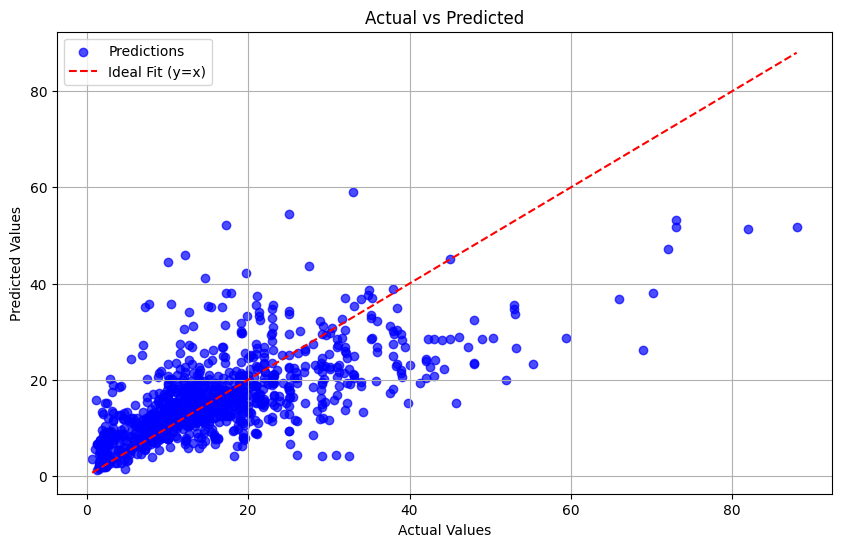

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Tur['Actual'], results_Tur['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Tur['Actual'].min(), results_Tur['Predicted'].min())
max_val = max(results_Tur['Actual'].max(), results_Tur['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [ ]:
y_ph_pred = model_ph.predict(X_ph_test)
y_ph_pred

array([7.484, 6.86 , 7.19 , ..., 6.94 , 7.196, 7.304])

In [ ]:
results_Ph = pd.DataFrame({
    'Actual': y_ph_test.flatten() if hasattr(y_ph_test, 'flatten') else y_ph_test,
    'Predicted': y_ph_pred.flatten() if hasattr(y_ph_pred, 'flatten') else y_ph_pred
})

results_Ph

,Actual,Predicted
4139,7.43,7.484
586,6.92,6.860
553,6.82,7.190
227,7.00,7.120
1321,6.85,6.856
...,...,...
1433,6.91,6.890
1018,6.67,6.658
582,6.82,6.940
203,7.13,7.196


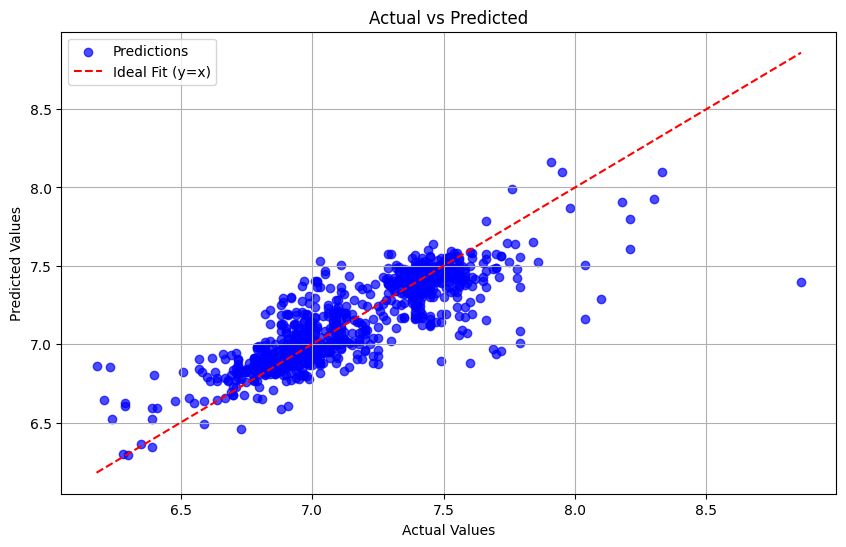

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Ph['Actual'], results_Ph['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Ph['Actual'].min(), results_Ph['Predicted'].min())
max_val = max(results_Ph['Actual'].max(), results_Ph['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [ ]:
y_colour_pred = model_colour.predict(X_colour_test)
y_colour_pred

array([24. , 44.8, 24.2, ..., 45.4, 69.2, 19.6])

In [ ]:
results_Colo = pd.DataFrame({
    'Actual': y_colour_test.flatten() if hasattr(y_colour_test, 'flatten') else y_colour_test,
    'Predicted': y_colour_pred.flatten() if hasattr(y_colour_pred, 'flatten') else y_colour_pred
})


results_Colo

,Actual,Predicted
4139,10.0,24.0
586,17.0,44.8
553,19.0,24.2
227,20.0,17.2
1321,26.0,24.2
...,...,...
1433,28.0,35.6
1018,33.0,56.2
582,25.0,45.4
203,130.0,69.2


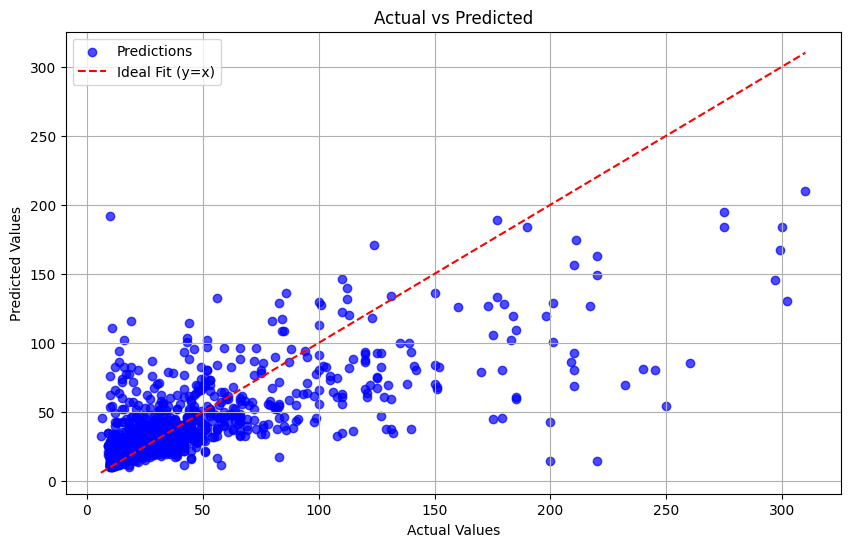

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Colo['Actual'], results_Colo['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Colo['Actual'].min(), results_Colo['Predicted'].min())
max_val = max(results_Colo['Actual'].max(), results_Colo['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()




In [ ]:
def evaluate_model(y_test, y_pred, target_name):
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Convert R² to percentage
    print(f"\nEvaluation Metrics for {target_name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print(f"Accuracy: {accuracy:.2f}%")

evaluate_model(y_turbidity_test, y_turbidity_pred, "Turbidity")
evaluate_model(y_ph_test, y_ph_pred, "PH")
evaluate_model(y_colour_test, y_colour_pred, "Colour")


Evaluation Metrics for Turbidity:
Mean Absolute Error (MAE): 5.69
Mean Squared Error (MSE): 70.63
R-squared (R²): 0.44
Accuracy: 44.10%

Evaluation Metrics for PH:
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.03
R-squared (R²): 0.72
Accuracy: 72.14%

Evaluation Metrics for Colour:
Mean Absolute Error (MAE): 18.75
Mean Squared Error (MSE): 1087.74
R-squared (R²): 0.50
Accuracy: 49.95%


# Validation

In [ ]:
def predict_from_input():
    print("Enter the following feature values:")
    raw_turbidity = float(input("Raw Turbidity: "))
    raw_ph = float(input("Raw PH: "))
    raw_colour = float(input("Raw Colour: "))
    pac = float(input("PAC: "))
    kmno4 = float(input("KMnO4: "))
    acd = float(input("ACD: "))

    # Combine inputs into a DataFrame
    input_data = pd.DataFrame({
        'Raw_Turbidity': [raw_turbidity],
        'Raw_PH': [raw_ph],
        'Raw_Colour': [raw_colour],
        'PAC': [pac],
        'KMnO4': [kmno4],
        'ACD': [acd]
    })

    # Make predictions
    turbidity_pred = model_turbidity.predict(input_data)
    ph_pred = model_ph.predict(input_data)
    colour_pred = model_colour.predict(input_data)

    # Display predictions
    print("\nPredicted Values:")
    print(f"Turbidity: {turbidity_pred[0]:.2f}")
    print(f"PH: {ph_pred[0]:.2f}")
    print(f"Colour: {colour_pred[0]:.2f}")

# Call the function to test
predict_from_input()


# Hyper parameter Tunning

In [ ]:
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)

In [ ]:
grid_search.fit(X_turbidity, y_turbidity)

print("\nBest Parameters for Turbidity:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)


Best Parameters for Turbidity: {'n_neighbors': 20}
Best Score (MSE): 126.69880822732614


In [ ]:
grid_search.fit(X_ph, y_ph)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Parameters: {'n_neighbors': 20}
Best Score: 0.0423299445641528


In [ ]:
grid_search.fit(X_colour, y_colour)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Parameters: {'n_neighbors': 20}
Best Score: 2596.6822851543584
